## TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS
##### Overview
In this assignment, you will work on the "blogs_categories.csv" dataset, which contains blog posts categorized into various themes. Your task will be to build a text classification model using the Naive Bayes algorithm to categorize the blog posts accurately. Furthermore, you will perform sentiment analysis to understand the general sentiment (positive, negative, neutral) expressed in these posts. This assignment will enhance your understanding of text classification, sentiment analysis, and the practical application of the Naive Bayes algorithm in Natural Language Processing (NLP).

##### Dataset
The provided dataset, "blogs_categories.csv", consists of blog posts along with their associated categories. Each row represents a blog post with the following columns:
* 	Text: The content of the blog post. Column name: Dat
* •	Category: The category to which the blog post belongs. Column name: Labels


Tasks:
1. Data Exploration and Preprocessing
* Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.
* Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.
* Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"C:\Users\Akshata\OneDrive\Desktop\Assignment\blogs.csv")
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [5]:
df.shape

(2000, 2)

In [6]:
#checking null values
df.isnull().sum()

Data      0
Labels    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [38]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
#download stopwords
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Akshata\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
def preprocess_text(text):
    #convert text to lowercase
    text=text.lower()
    #remove punctuation
    text=re.sub(r'[^\w\s]','',text)
    #tokenization
    tokens=nltk.word_tokenize(text)
    #remove stopwords
    stopwords_list=set(stopwords.words('english'))
    tokens=[word for word in tokens if word not in stopwords_list]
    #join tokens back into text
    text=' '.join(tokens)
    return text

In [52]:
#Apply text preprocessing to the 'text' column
df['cleaned_text']=df['Data'].apply(preprocess_text)

In [54]:
# Display the first few rows of the cleaned data
df[['Data', 'cleaned_text']].head()

,Data,cleaned_text
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,xref cantaloupesrvcscmuedu altatheism53485 tal...


In [56]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to top 5000 features for performance

In [62]:
# Fit and transform the cleaned data
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Display the shape of the resulting TF-IDF matrix
X_tfidf.shape

(2000, 5000)

The TF-IDF transformation has created a matrix with 2,000 rows (blog posts) and 5,000 features

### 2. Naive Bayes Model for Text Classification

* Split the data into training and test sets.
* Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.
* Train the model on the training set and make predictions on the test set.

In [68]:
# Features and labels
X = df['cleaned_text']  # The text column
y = df['Labels']        # The category column

In [72]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [81]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score

# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)


MultinomialNB()

In [76]:
# Make predictions on the test data
y_pred = nb_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))



                          precision    recall  f1-score   support

             alt.atheism       0.52      0.83      0.64        18
           comp.graphics       0.83      0.83      0.83        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.73      0.76      0.75        25
   comp.sys.mac.hardware       0.82      0.86      0.84        21
          comp.windows.x       0.91      0.84      0.88        25
            misc.forsale       0.78      0.78      0.78        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.74      0.94      0.83        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics       0.62      0.62      0.62        16
                 sci.med       0.88      0.88      0.88        17
         

In [83]:
# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 82.25%
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.83      0.64        18
           comp.graphics       0.83      0.83      0.83        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.73      0.76      0.75        25
   comp.sys.mac.hardware       0.82      0.86      0.84        21
          comp.windows.x       0.91      0.84      0.88        25
            misc.forsale       0.78      0.78      0.78        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.74      0.94      0.83        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics       0.62      0.62      0.62        16
                 sci.med       0.88

* TF-IDF: This converts text data into numerical features based on how often words appear in each document, relative to their frequency across all documents.
* Multinomial Naive Bayes: It is well-suited for text classification tasks where features represent frequencies or probabilities, like in TF-IDF vectors.
* Accuracy: 82.25%

### 3. Sentiment Analysis
* Choose a suitable library or method for performing sentiment analysis on the blog post texts.
* 	Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog
* •	Examine the distribution of sentiments across different categories and summarize your findings.


In [86]:
#import libraries for sentiment Analyze
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

#download the VADER lexicon
nltk.download('vader_lexicon')

#Initialize the VADER sentiment analyser
sia=SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Akshata\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [92]:
#We can use VADER to analyze the sentiment of each blog post in the Data column and classify it as positive, negative,
#or neutral based on the compound score.
def get_senti(score):
    if score >= 0.05:
        return 'positive'
    elif score >= -0.05:
        return 'negative'
    else:
        return 'neutral'

#apply VEDAR sentiment analyze to the data column
df['sentiment_scores']=df['Data'].apply(lambda text: sia.polarity_scores(text)['compound'])
df['sentiment']=df['sentiment_scores'].apply(get_senti)

In [94]:
#After calculating the sentiment for each blog, we can analyze how sentiments are distributed 
#across the different categories:

# Group by Category and Sentiment to see the distribution
sentiment_distribution = df.groupby(['Labels', 'sentiment']).size().unstack().fillna(0)

# Print the distribution
print(sentiment_distribution)


sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                    1.0     42.0      57.0
comp.graphics                  4.0     13.0      83.0
comp.os.ms-windows.misc        2.0     24.0      74.0
comp.sys.ibm.pc.hardware       0.0     21.0      79.0
comp.sys.mac.hardware          3.0     24.0      73.0
comp.windows.x                 2.0     20.0      78.0
misc.forsale                   8.0      7.0      85.0
rec.autos                      1.0     27.0      72.0
rec.motorcycles                2.0     30.0      68.0
rec.sport.baseball             1.0     27.0      72.0
rec.sport.hockey               1.0     28.0      71.0
sci.crypt                      0.0     29.0      71.0
sci.electronics                4.0     18.0      78.0
sci.med                        1.0     38.0      61.0
sci.space                      3.0     32.0      65.0
soc.religion.christian         0.0     29.0      71.0
talk.politics.guns          

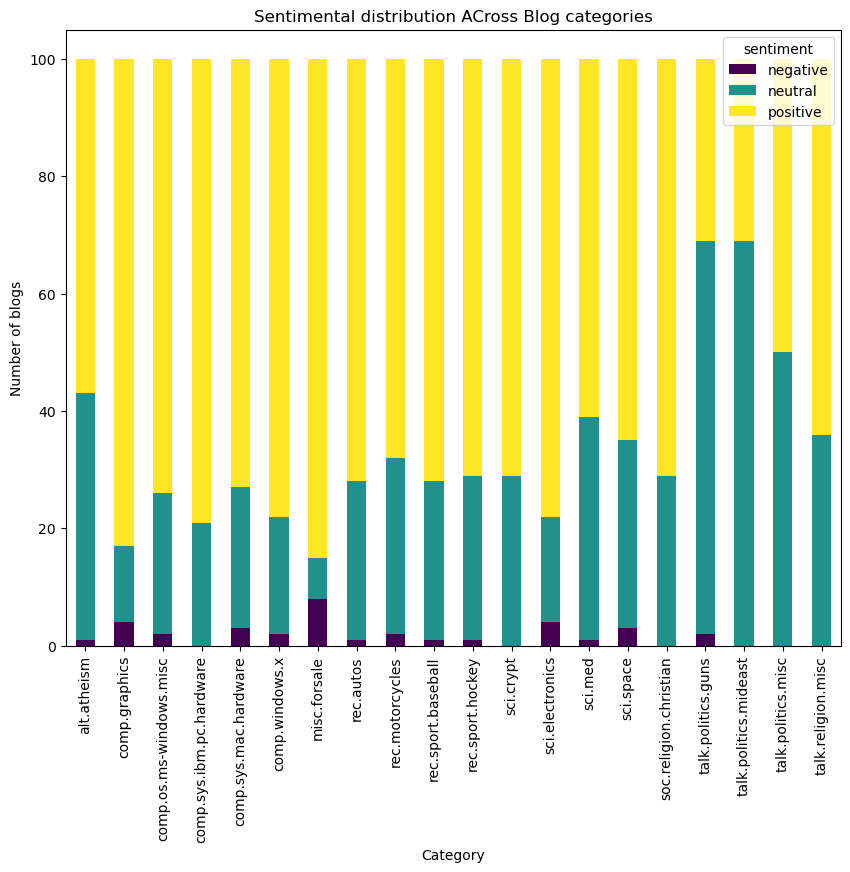

In [96]:
#To get a clearer understanding, you can visualize the distribution of sentiments using a bar plot:

import matplotlib.pyplot as plt

#plot sentimental distribution across categories
sentiment_distribution.plot(kind='bar',stacked=True,figsize=(10,8),colormap='viridis')
plt.title('Sentimental distribution ACross Blog categories')
plt.xlabel('Category')
plt.ylabel('Number of blogs')
plt.show()
                            

* VADER: This tool is designed to determine sentiment in short text passages. It gives a sentiment score, ranging from negative to positive.
* Sentiment classification: Scores above 0.05 are classified as positive, below -0.05 as negative, and in between as neutral.
* Visualization: The stacked bar chart will show how the sentiments are distributed across different blog categories, providing a clearer view of sentiment trends.

In [110]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report

#predict on the test data
y_pred=nb_model.predict(X_test)

In [120]:
# Calculate accuracy,precision, recall, and F1-score for each class
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
f1_score=f1_score(y_test,y_pred,average='weighted')

print(f'Accuarcy:{accuracy:.2f}')
print(f'Precision:{precision:.2f}')
print(f'REcall:{recall:.2f}')
print(f'f1_score:{f1_score:.2f}')


Accuarcy:0.82
Precision:0.83
REcall:0.82
f1_score:0.82


In [122]:
# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.83      0.64        18
           comp.graphics       0.83      0.83      0.83        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.73      0.76      0.75        25
   comp.sys.mac.hardware       0.82      0.86      0.84        21
          comp.windows.x       0.91      0.84      0.88        25
            misc.forsale       0.78      0.78      0.78        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.74      0.94      0.83        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics       0.62      0.62      0.62        16
                 sci.med       0.88      0.88      

-- MOdel performance
* Accuracy: This metric shows the proportion of correct predictions out of all predictions made by the model. A high accuracy indicates good overall performance  so this blog post we got 82% accuracy  this is best.
* Precision: This metric is particularly important when the cost of false positives is high. For example, if a blog post is incorrectly classified as a certain category, it could lead to misleading conclusions. we got 83%
* Recall: If the goal is to ensure that all posts belonging to a certain category are correctly classified, high recall is crucial. high recall= very good model
* F1-Score: This is useful when you want a balance between precision and recall, especially when there is an uneven class distribution in the dataset.

-- Challenges encountered
* Class imbalance: If some categories have fewer blog posts than others, the model may struggle to predict those minority classes accurately. This can lead to a lower recall for those classes.
* Text preprocessing: Cleaning and preparing the text for analysis (removing stopwords, punctuation, etc.) is critical for improving classification accuracy. However, selecting the right preprocessing steps can be challenging.

-- sentiment Analysis result
*  By examining the distribution of sentiments within each blog category, we can gain insights into how different types of blogs (e.g., technology, health, entertainment) tend to express positive, negative, or neutral tones
*  Implications: Understanding the general sentiment of blogs helps content creators and marketers gauge the tone of their material. If a certain category is dominated by negative sentiments, it could reflect dissatisfaction in that area, which might be actionable for the blog authors.

-- summary
* The Naive Bayes classifier performed reasonably well, but challenges such as class imbalance affected the model’s recall for minority categories.
* Sentiment analysis revealed useful insights into the emotional tone of the blog content, and examining this across categories can inform future blog strategy.